In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
from datetime import date
import datetime as dt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from xgboost import XGBRegressor

### Reading Data

In [181]:
data=pd.read_csv("Traffic.csv",parse_dates=["Date"])

##### Descriptive statistics

In [182]:
data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [183]:
data.shape

(2976, 9)

In [184]:
Day_dict={"Monday":0,"Tuesday":1,"Wednesday":2,"Thursday":3,"Friday":4,"Saturday":5,"Sunday":6}
for val in data["Traffic Situation"].unique():
    if val=="low":
        Day_dict[val]=1
    if val=="normal":
        Day_dict[val]=2
    if val=="high":
        Day_dict[val]=3
    if val=="heavy":
        Day_dict[val]=4
        

In [185]:
data=df

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   object
 2   Day of the week    2976 non-null   int64 
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   int64 
 9   hour               2976 non-null   int64 
 10  minute             2976 non-null   int64 
 11  Temp               2976 non-null   object
 12  AM/PM              2976 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 302.4+ KB


In [187]:
data.describe()

,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,minute,AM/PM
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.00000,2976.000000,2976.000000
mean,3.903226,68.696573,14.917339,15.279570,15.324933,114.218414,1.342742,11.50000,22.500000,0.500000
std,1.940643,45.850693,12.847518,14.341986,10.603833,60.190627,0.803439,6.92335,16.773328,0.500084
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.00000,0.000000,0.000000
25%,2.000000,19.000000,5.000000,1.000000,6.000000,55.000000,1.000000,5.75000,11.250000,0.000000
50%,4.000000,64.000000,12.000000,12.000000,14.000000,109.000000,1.000000,11.50000,22.500000,0.500000
75%,6.000000,107.000000,22.000000,25.000000,23.000000,164.000000,2.000000,17.25000,33.750000,1.000000
max,7.000000,180.000000,70.000000,50.000000,40.000000,279.000000,3.000000,23.00000,45.000000,1.000000


In [188]:
#Checking for null values 
data.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
hour                 0
minute               0
Temp                 0
AM/PM                0
dtype: int64

In [189]:
data.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation', 'hour', 'minute', 'Temp',
       'AM/PM'],
      dtype='object')

### Exploratory Data Analysis

#### Check for correlations between features

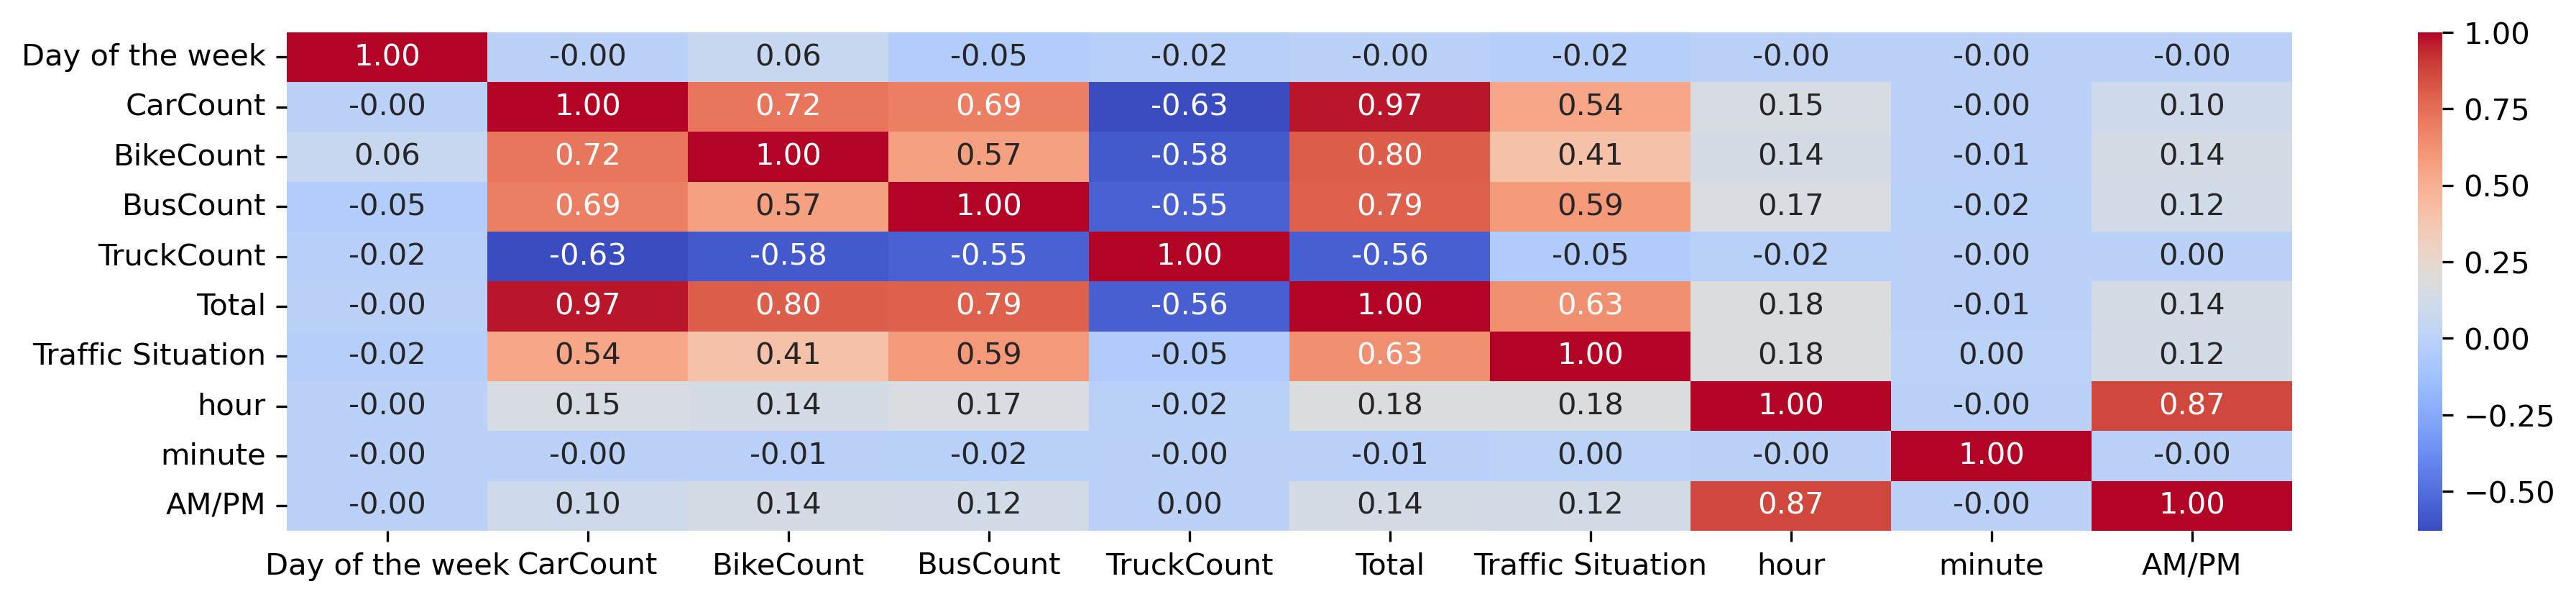

In [190]:
# plt.figure(figsize=(20,15))
correlation=data.corr()
sbs.heatmap(correlation,annot=True,cbar=True,cmap="coolwarm",fmt=".2f")
plt.show()

### Relations

##### Checking when the traffic was worst according to some factors

#### Total Vs Traffic Situation
  It seems the total number of vehicles on the street might have a strong positive relationship to the traffic.

Text(0.5, 1.0, 'The number of average total transports for each category of Traffic')

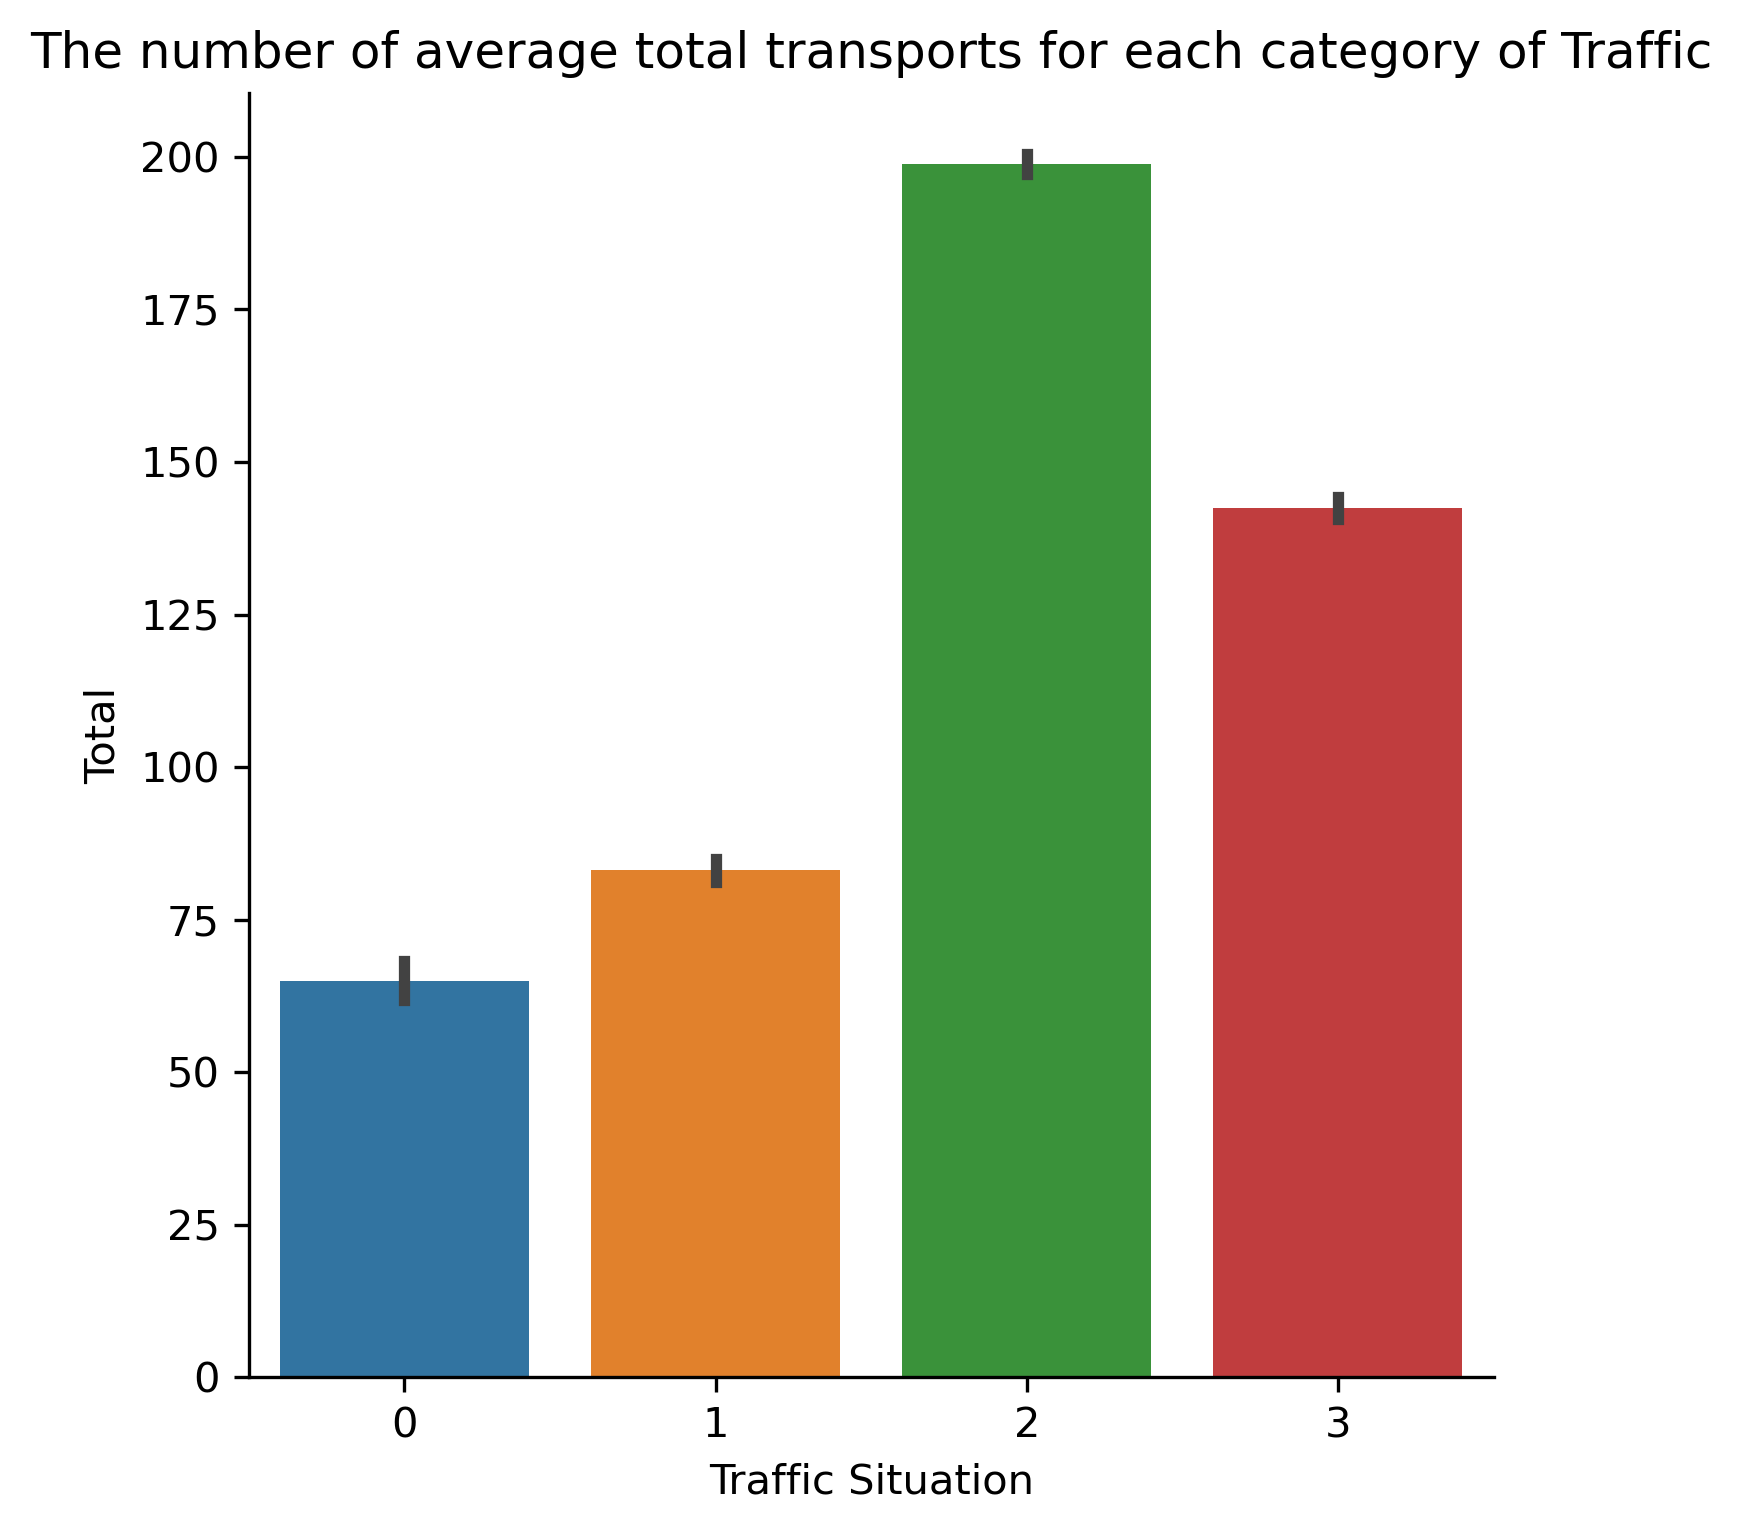

In [191]:
sbs.catplot(data=df.copy().sort_values("Traffic Situation", key=lambda
                                       x:x.map(Day_dict)),x="Traffic Situation",y="Total",kind="bar")
plt.title("The number of average total transports for each category of Traffic")

From above its clear the number of vehicles increases the traffic  condition got worse significantly

Here we have 5 types of Vehicles

In [61]:
meansOT=["CarCount","BikeCount","BusCount","TruckCount"]
for mean in meansOT:
    print(mean)
    print(f"Q1,Median, Q3:{np.quantile(df[mean],[0.25,0.5,0.75])}")
    print(f"Max and Min:{df[mean].max()} and {df[mean].min()}")
    print(f"Total number of recorded vehicles>0:{df[mean].loc[df[mean]>0].sum()}")
    print(f"total number of counts=0:){df[mean].loc[df[mean]==0].count()}")
    print("\n")

CarCount
Q1,Median, Q3:[ 19.  64. 107.]
Max and Min:180 and 6
Total number of recorded vehicles>0:204441
total number of counts=0:)0


BikeCount
Q1,Median, Q3:[ 5. 12. 22.]
Max and Min:70 and 0
Total number of recorded vehicles>0:44394
total number of counts=0:)145


BusCount
Q1,Median, Q3:[ 1. 12. 25.]
Max and Min:50 and 0
Total number of recorded vehicles>0:45472
total number of counts=0:)437


TruckCount
Q1,Median, Q3:[ 6. 14. 23.]
Max and Min:40 and 0
Total number of recorded vehicles>0:45607
total number of counts=0:)119




### Day of the week vs Traffic Situation

In [83]:
grouped_df=df.groupby(["Day of the week","Traffic Situation"]).sum()[meansOT+["Total"]]
grouped_df=grouped_df.reset_index(inplace=False)
grouped_df=grouped_df.sort_values(by=["Day of the week","Traffic Situation"],key=lambda x:x .map(Day_dict))
grouped_df.head()

,Day of the week,Traffic Situation,CarCount,BikeCount,BusCount,TruckCount,Total
5,Monday,low,1551,353,186,289,2379
6,Monday,normal,9543,1831,1870,4389,17633
4,Monday,high,3939,727,1053,1058,6777
3,Monday,heavy,10860,2153,3097,477,16587
21,Tuesday,low,1688,272,186,255,2401


[Text(0.5, 1.0, 'Trend of traffic situtaion grouped by days of a week')]

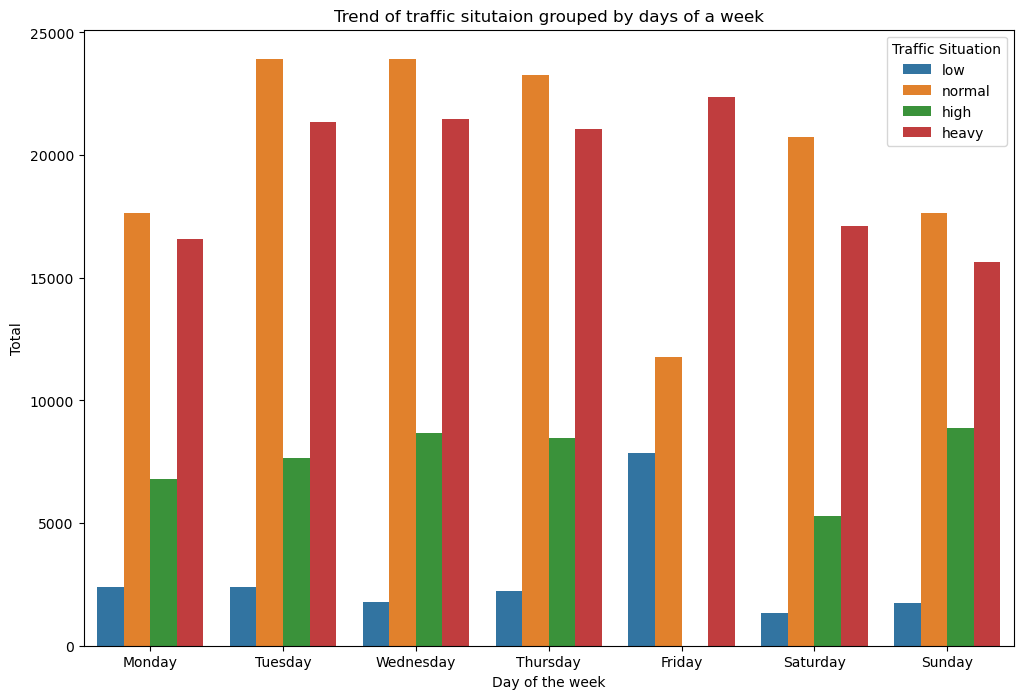

In [90]:
fig=plt.subplots(figsize=(12,8))
sbs.barplot(data=grouped_df,x="Day of the week",y="Total",hue="Traffic Situation").set(title="Trend of traffic situtaion grouped by days of a week")

From above plot we can see traffic on weekdays is heavier than it at the weekends and Monday they are quite same other than Friday.Friday has higher Traffic.


In [92]:
data.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

### Time of a day of the week vs Total
For visualisation of data we can group hour together and convert it into 24 hour convention

### Feature Engineering

In [103]:
# Different types of Traffic Congestion
data["Traffic Situation"].value_counts()

normal    1669
heavy      682
high       321
low        304
Name: Traffic Situation, dtype: int64

In [111]:
# Converting Traffic into numeric form
data["Traffic Situation"]=data["Traffic Situation"].replace({"low":0,"normal":1,"heavy":2,"high":3})
data["Traffic Situation"].value_counts()

1    1669
2     682
3     321
0     304
Name: Traffic Situation, dtype: int64

In [110]:
# Coverting Day of week
data["Day of the week"].value_counts()

Tuesday      480
Wednesday    480
Thursday     480
Friday       384
Saturday     384
Sunday       384
Monday       384
Name: Day of the week, dtype: int64

In [113]:
data["Day of the week"]=data["Day of the week"].replace({"Monday":1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6,"Sunday":7})
data["Day of the week"].value_counts()

2    480
3    480
4    480
5    384
6    384
7    384
1    384
Name: Day of the week, dtype: int64

In [114]:
df=data

In [121]:
#Seperating time format into hour and minutes

#Hour in seperate column
data["hour"]=pd.to_datetime(data["Time"]).dt.hour

#Minutes in Seprate column
data["minute"]=pd.to_datetime(data["Time"]).dt.minute

#replace AM with 0
#replace PM with 1

data["Temp"]=data["Time"].apply(lambda x:x.split(" ")[1])
data["AM/PM"]=data["Temp"].replace({"AM":0,"PM":1})

In [122]:
# Removing "Temp"and "Time" columns
data=data.drop(columns=["Time","Temp"], axis=1)
data

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,minute,AM/PM
0,10,2,31,0,4,4,39,0,0,0,0
1,10,2,49,0,3,3,55,0,0,15,0
2,10,2,46,0,3,6,55,0,0,30,0
3,10,2,51,0,2,5,58,0,0,45,0
4,10,2,57,6,15,16,94,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2971,9,4,16,3,1,36,56,1,22,45,1
2972,9,4,11,0,1,30,42,1,23,0,1
2973,9,4,15,4,1,25,45,1,23,15,1
2974,9,4,16,5,0,27,48,1,23,30,1


### Correlation using Heatmap

In [123]:
data[["Date","Day of the week","CarCount","BikeCount","BusCount","TruckCount","Total","Traffic Situation","hour","minute","AM/PM","Traffic Situation"]].corr()

,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,minute,AM/PM,Traffic Situation
Day of the week,1.000000e+00,-0.002230,0.063583,-0.046031,-0.021895,-0.002953,-0.024423,-2.874150e-16,-5.201713e-17,-1.206884e-16,-0.024423
CarCount,-2.230275e-03,1.000000,0.722539,0.692994,-0.628157,0.970443,0.541331,1.480863e-01,-3.359952e-03,1.026836e-01,0.541331
BikeCount,6.358283e-02,0.722539,1.000000,0.566364,-0.575399,0.797429,0.407324,1.405488e-01,-7.978481e-03,1.404737e-01,0.407324
BusCount,-4.603119e-02,0.692994,0.566364,1.000000,-0.546931,0.790705,0.590153,1.657507e-01,-1.615958e-02,1.209151e-01,0.590153
TruckCount,-2.189502e-02,-0.628157,-0.575399,-0.546931,1.000000,-0.555471,-0.049809,-1.695231e-02,-1.119745e-03,9.508203e-05,-0.049809
Total,-2.952752e-03,0.970443,0.797429,0.790705,-0.555471,1.000000,0.631150,1.793136e-01,-8.310162e-03,1.370317e-01,0.631150
Traffic Situation,-2.442348e-02,0.541331,0.407324,0.590153,-0.049809,0.631150,1.000000,1.750623e-01,2.993107e-03,1.246532e-01,1.000000
hour,-2.874150e-16,0.148086,0.140549,0.165751,-0.016952,0.179314,0.175062,1.000000e+00,-1.003662e-17,8.667781e-01,0.175062
minute,-5.201713e-17,-0.003360,-0.007978,-0.016160,-0.001120,-0.008310,0.002993,-1.003662e-17,1.000000e+00,-6.691275e-18,0.002993
AM/PM,-1.206884e-16,0.102684,0.140474,0.120915,0.000095,0.137032,0.124653,8.667781e-01,-6.691275e-18,1.000000e+00,0.124653


<AxesSubplot:>

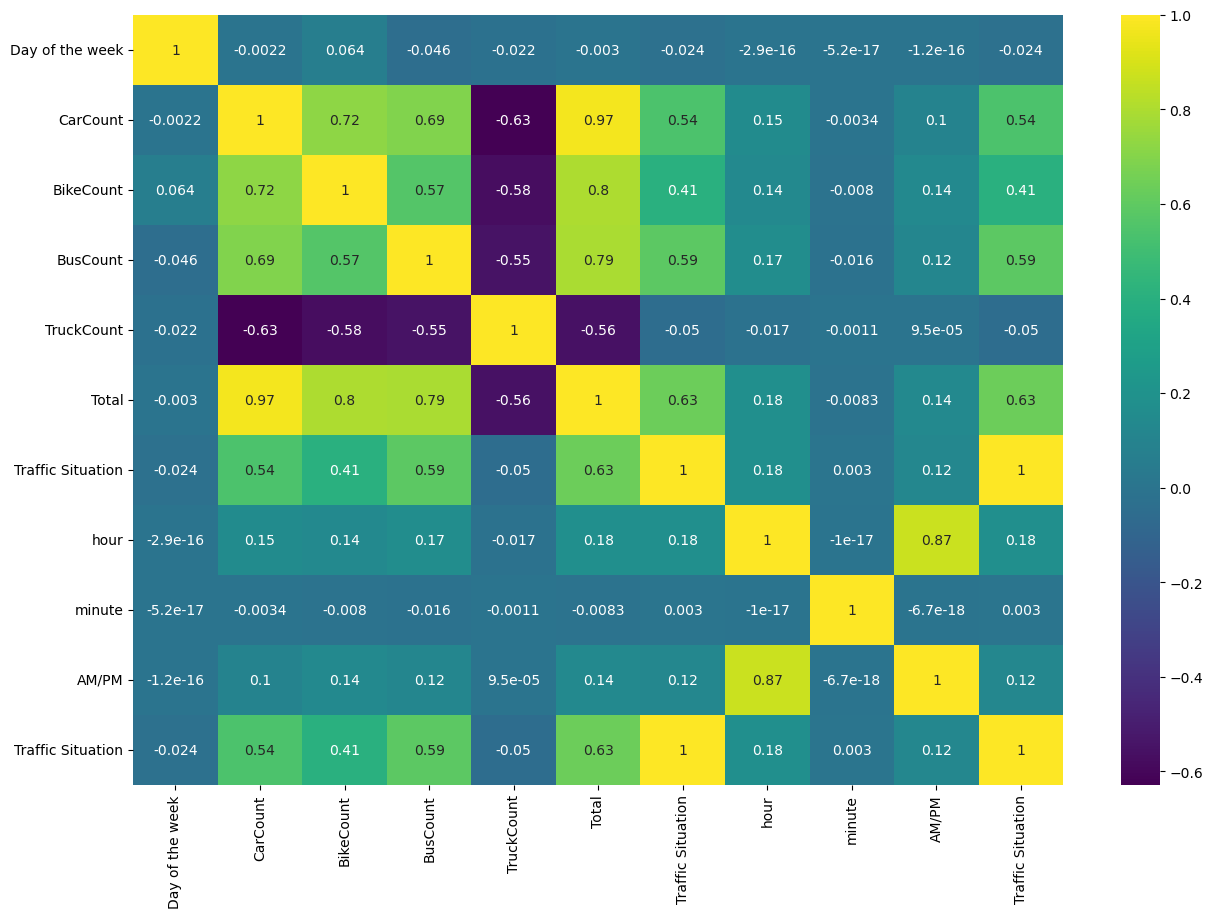

In [128]:
plt.figure(figsize=(15,10))
sbs.heatmap(data[["Date","Day of the week","CarCount","BikeCount","BusCount","TruckCount","Total","Traffic Situation","hour","minute","AM/PM","Traffic Situation"]].corr(),cmap="viridis",annot=True)

### Splitting Data into X and y

In [129]:
data.columns

Index(['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation', 'hour', 'minute', 'AM/PM'],
      dtype='object')

In [131]:
X=data[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'hour', 'minute', 'AM/PM']]

In [132]:
y=data["Traffic Situation"].values

In [136]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=0)

### Feature Scaling

In [141]:
sc=StandardScaler()
train_X=sc.fit_transform(train_X)
test_X=sc.transform(test_X)

### Selecting Model using Voting Classifier

In [143]:
model1=LogisticRegression()
model2=RandomForestClassifier()
model3=SVC(probability=True)
model4=XGBClassifier()
model5=AdaBoostClassifier()


In [144]:
voting_clsfier=VotingClassifier(estimators=[("lr",model1),("rf",model2),("svc",model3),("xgb",model4),("ada",model5)],voting="hard")
voting_clsfier.fit(train_X,train_y)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None...
                                            importance_type=None,
                                            interaction_constraints=None,
                    

In [146]:
voting_pred=voting_clsfier.predict(test_X)
accuracy=accuracy_score(test_y,voting_pred)

In [147]:
accuracy

0.9446308724832215

In [149]:
#Voting classifier using Cross_validation
for clf, label in zip([model1,model2,model3,model4,model5],["lr","rf","svc","xgb","ada"]):
    scores=cross_val_score(clf,train_X,train_y,scoring="accuracy",cv=5)
    print("Accuracy:",(scores.mean(),label))

Accuracy: (0.8991596638655462, 'lr')
Accuracy: (0.9945378151260504, 'rf')
Accuracy: (0.9147058823529411, 'svc')
Accuracy: (0.9983193277310924, 'xgb')
Accuracy: (0.5609243697478992, 'ada')


From above understood that XGBoost and Random Forest have high accuracy. Among that XGBoost is more accurate.
So can select XGBoost for Model Development

In [150]:
### Train the XGBoost Model
model=XGBClassifier()
model.fit(train_X,train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [171]:
reg=XGBRegressor(n_estimators=300,learning_rate=0.01)
reg.fit(train_X,train_y),
eval_set=[(train_X,train_y),(test_X,test_y)],
eval_metric="mse"

In [172]:
predictions=reg.predict(test_X)

In [164]:
test_df=df.reset_index().drop("index",axis=1)
test_df["predictions"]=pd.Series(predictions)

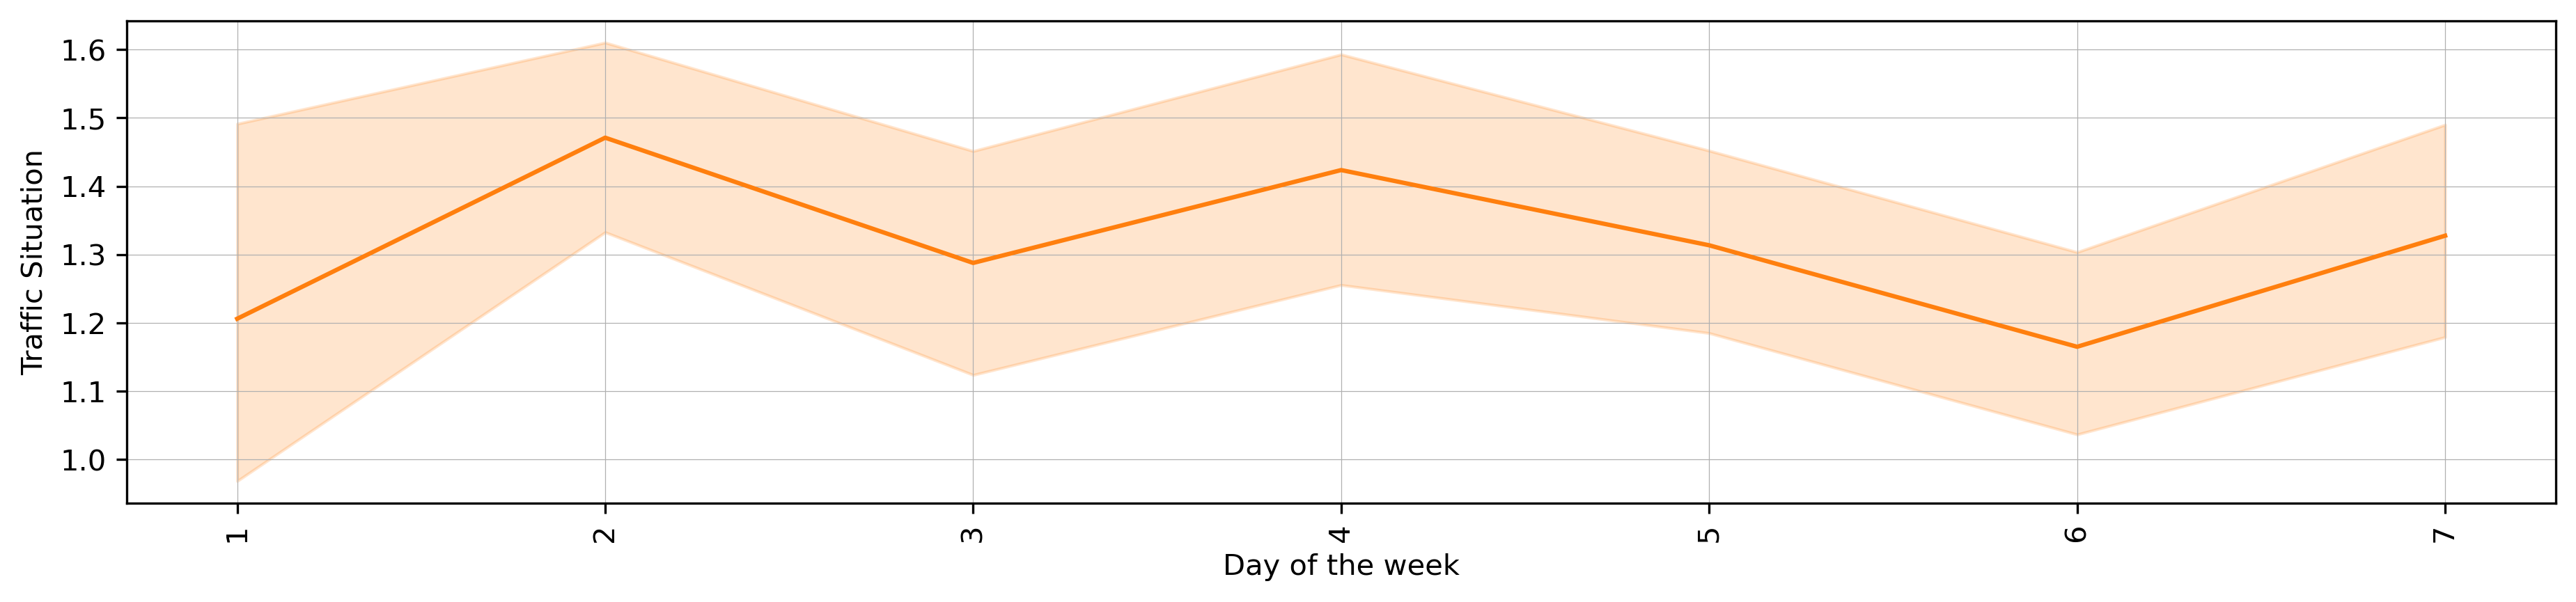

In [174]:
plt.rcParams.update({"figure.figsize":(15,3),"figure.dpi":300})
fig,ax=plt.subplots()
sbs.lineplot(data=data.tail(),x="Day of the week",y="Traffic Situation")
sbs.lineplot(data=test_df,x="Day of the week",y="predictions")
plt.grid(linestyle="-",linewidth=0.3)
ax.tick_params(axis="x",rotation=90)

 From above plot we can understood the actual value and the predicted values are in the same pattern.So the traffic can be reduced by  taking measures of using public transports,pooling,common transportation provided by companies etc

In [176]:
test_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,minute,Temp,AM/PM,predictions
0,12:00:00 AM,10,2,31,0,4,4,39,0,0,0,AM,0,1.017078
1,12:15:00 AM,10,2,49,0,3,3,55,0,0,15,AM,0,2.917398
2,12:30:00 AM,10,2,46,0,3,6,55,0,0,30,AM,0,2.917398
3,12:45:00 AM,10,2,51,0,2,5,58,0,0,45,AM,0,1.967245
4,1:00:00 AM,10,2,57,6,15,16,94,1,1,0,AM,0,1.017078


In [178]:
#Saving Dataset
test_df.to_csv("new_traffic_data")

In [ ]:
model.save_model('xgb_model.bin')